# ARIM-Academy：　基礎編　Scikit-learn（次元削減とクラスター分析）

## 本編の目標
本演習では**『茶の元素分析データセット』**を用いて、**次元削減**と**クラスタリング**の技術を使ってデータ分析を学びます。

### 本編における内容
以下の内容に取り組みます。

1. **次元削減技術の学習**: 高次元データを低次元に変換する次元削減手法（主成分分析（PCA）、t-SNE、UMAPなど）を学びます。これにより、多次元データを視覚化し、データの理解を深めることができます。次元削減を通じて、データのパターンを抽出し、複雑なデータセットの分析を簡素化することができます。

2. **クラスタリングアルゴリズムの理解**: クラスタリング手法（階層クラスタリングやK-means）を使用して、データセット内の類似性、グループやパターンを識別します。クラスタリングを通じて、データの内部構造を発見し、データ群がどのようにグループ化されるかを把握することができます。

3. **次元削減とクラスタリングの統合的活用**: 次元削減とクラスタリングを組み合わせることで、データの可視化や構造の理解を深めることができます。次元削減によって得られた低次元のデータを用いて、クラスタリング結果を視覚化し、データのクラスタリングパターンを把握することで、データ分析の洞察を得ることができます。

---

### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
%pip install umap-learn

!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
カリキュラムで扱うpythonのライブラリを`import`文でロードします。機械学習のライブラリであるscikit-learnは後半でimportします。

In [1]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### サンプルファイルの読み込み
pandasライブラリの`read_csv()`はcsvファイルを読み込むメソッドであり、指定したファイルの読み込みます。ここでは[data]フォルダーに格納されているIris.csvのファイルのをデータフレームとして読み込み、そのデータフレームはdfという変数に格納します。

In [4]:
#データセットの読み込み
df=pd.read_csv("data/tea_data.csv")
df

Al     Ca        Cu     Fe       K      Mg      Mn     Na     Zn tea
0     3.297  4.356  0.031290  0.067   99.06   3.531   1.455  0.541  0.131  BT
1     4.267  4.118  0.031290  0.079  106.50   3.378   1.542  0.603  0.126  BT
2     4.088  4.763  0.033370  0.084  114.00   4.763   1.838  1.058  0.156  BT
3     4.338  4.556  0.033370  0.091  122.60   5.005   2.269  0.958  0.162  BT
4     4.732  5.138  0.035514  0.110  132.40   5.626   2.998  1.510  0.165  BT
..      ...    ...       ...    ...     ...     ...     ...    ...    ...  ..
163  16.690  8.895  0.153000  0.236  323.40  20.450  10.420  6.360  0.335  GC
164  17.620  8.909  0.177000  0.261  334.20  23.486  11.330  7.133  0.351  GC
165  17.920  9.056  0.180000  0.266  332.30  22.840  11.290  7.609  0.358  GC
166  17.820  9.128  0.175000  0.273  367.30  24.560  12.110  8.537  0.372  GC
167  17.650  9.048  0.197000  0.285  358.40  24.340  12.310  8.631  0.378  GC

[168 rows x 10 columns]

### データセットの分割（Data set splitting）

In [5]:
# 数値データ部とラベル部の用意しましょう

X = df.iloc[0:, 0:9] # ガクと花びらの長さ、幅のデータ
y = df.iloc[0:, 9]   # 品種（ラベル）

In [9]:
X

Al     Ca        Cu     Fe       K      Mg      Mn     Na     Zn
0     3.297  4.356  0.031290  0.067   99.06   3.531   1.455  0.541  0.131
1     4.267  4.118  0.031290  0.079  106.50   3.378   1.542  0.603  0.126
2     4.088  4.763  0.033370  0.084  114.00   4.763   1.838  1.058  0.156
3     4.338  4.556  0.033370  0.091  122.60   5.005   2.269  0.958  0.162
4     4.732  5.138  0.035514  0.110  132.40   5.626   2.998  1.510  0.165
..      ...    ...       ...    ...     ...     ...     ...    ...    ...
163  16.690  8.895  0.153000  0.236  323.40  20.450  10.420  6.360  0.335
164  17.620  8.909  0.177000  0.261  334.20  23.486  11.330  7.133  0.351
165  17.920  9.056  0.180000  0.266  332.30  22.840  11.290  7.609  0.358
166  17.820  9.128  0.175000  0.273  367.30  24.560  12.110  8.537  0.372
167  17.650  9.048  0.197000  0.285  358.40  24.340  12.310  8.631  0.378

[168 rows x 9 columns]

In [11]:
y

0      BT
1      BT
2      BT
3      BT
4      BT
       ..
163    GC
164    GC
165    GC
166    GC
167    GC
Name: tea, Length: 168, dtype: object

# 2. 次元削減
**次元削減**は、教師なし学習の一種としてデータ分析や機械学習において重要な手法で、データの持つ特徴量の数を削減し、データの本質的な構造や情報を維持しつつ、データの理解や視覚化を容易にする技術です。  

### 次元削減の種類
ここでは、線形次元削減である主成分分析（PCA）および非線形次元削減（多様体学習法）のt-分布型確率的近傍埋め込み（t-SNE）と統一マニホールド近似と射影（UMAP）について説明します。

1. **PCA(主成分分析)** :  
   PCAは線形次元削減手法であり、データの分散を最大化する直交する軸（主成分）を見つけます。教師なし学習の観点から、PCAはデータの分布の最も重要な方向を特定し、特徴量間の関連性を明らかにします。PCAはデータの線形な関係性を捉えるのに適しています。

2. **t-SNE（t-分布型確率的近傍埋め込み）**:  
    t-SNEは、非線形次元削減手法であり、特にデータのクラスタリング構造を視覚化するのに優れています。t-SNEは高次元データの局所的な構造を低次元空間に保持し、データポイント間の類似性を視覚的に表現します。教師なし学習として、t-SNEはデータの複雑な非線形パターンを明らかにするのに役立ちます。

3. **UMAP（統一マニホールド近似と射影）**:  
    UMAPは、t-SNEと同様に非線形次元削減手法で、データの局所的および大域的な構造を保持しつつ、次元を削減します。UMAPは計算が速く、大規模データセットにも適用可能です。教師なし学習の文脈では、UMAPはデータの全体的な構造とともに、局所的なクラスタリングのパターンを明らかにするのに有用です。めることが可能です。

## 1. 主成分分析
次元削減の一番汎用的な手法である「主成分分析」を行ってみましょう。

### ①　モデル構築
PCAクラスは、Scikit-learnライブラリから提供される主成分分析のクラスです。主成分分析では、データの次元を削減し、データの最も重要な変動を捉えるモデルを構築します。

In [6]:
from sklearn.decomposition import PCA

In [7]:
# 主成分分析（PCA）で2次元に次元削減
pca = PCA(n_components=2)  # 2次元に次元削減
X_pca = pca.fit_transform(X)

### 【解説】PCAのハイパーパラメータ
主成分分析（PCA）は、データの次元を削減するための手法であり、データの分散を最大化する直交する軸（主成分）を見つけます。PCAには少数のハイパーパラメータがあり、それらを適切に設定することで次元削減の結果を調整できます。以下はPCAの主なハイパーパラメータです。

1. **`n_components`**
- **説明**: 保持する主成分の数を指定します。これにより、次元削減後のデータセットの次元数が決定されます。
  - **整数値**: 保持する主成分の数を指定。例えば、`n_components=2`なら、2次元に削減されます。
  - **0 < n_components < 1 の小数値**: 累積寄与率が指定された値に達するまで主成分を保持。例えば、`n_components=0.95`なら、データの95%の分散を説明するのに十分な数の主成分が保持されます。
  - **`None`**: すべての成分が保持されますが、次元削減は行われません。
- **デフォルト値**: `None`

2. **`svd_solver`**
- **説明**: 特異値分解（SVD）を行うためのアルゴリズムを指定します。データのサイズや特性に応じて適切なアルゴリズムを選択します。
  - **`auto`**: デフォルトで、データセットのサイズに基づいて最適なアルゴリズムを選択します。
  - **`full`**: 完全なSVDを計算します。データが少ない場合や精度が求められる場合に使用します。
  - **`arpack`**: ARPACKライブラリを使用して特異値を計算します。`n_components`が1より小さい場合や、データセットが大きくて一部の成分だけを取得したい場合に適しています。
  - **`randomized`**: ランダム化されたSVDを計算します。高速で、大規模データに適しています。少しの精度の低下が許容される場合に使用します。

3. **`whiten`**
- **説明**: `True`に設定すると、主成分が分散1になるようにスケーリングされます。これは、次の処理ステップで特徴量のスケーリングが異なる場合に役立ちます。
- **デフォルト値**: `False`

4. **`tol`**
- **説明**: `svd_solver='arpack'`の場合に使用される、特異値分解における許容誤差。小さな値に設定するほど精度が高まりますが、計算コストが増加します。
- **デフォルト値**: `0.0`

5. **`random_state`**
- **説明**: `svd_solver='randomized'`の場合に使用される乱数シード。再現性のために設定します。
- **デフォルト値**: `None`

### その他の考慮事項
- **データの標準化**: PCAを実行する前にデータを標準化することが一般的です。これは、各特徴量のスケールが異なる場合に、主成分の抽出がそのスケールの影響を受けるのを防ぐためです。

これらのハイパーパラメータの設定によって、PCAの結果がどのように得られるかが大きく変わります。特に、`n_components`の設定は次元削減の度合いと情報の保持量を直接決定するため、データの特性や目的に応じて慎重に選択する必要があります。

### ②　二次元プロット（可視化）

次元削減の結果を視覚化するためのグラフです。主成分分析では**スコアプロット**とも呼ばれ、データのクラスタリングやクラス間の分離状態を確認でき、PCAによって次元削減がどれだけ有効であったかを直感的に理解することができます。

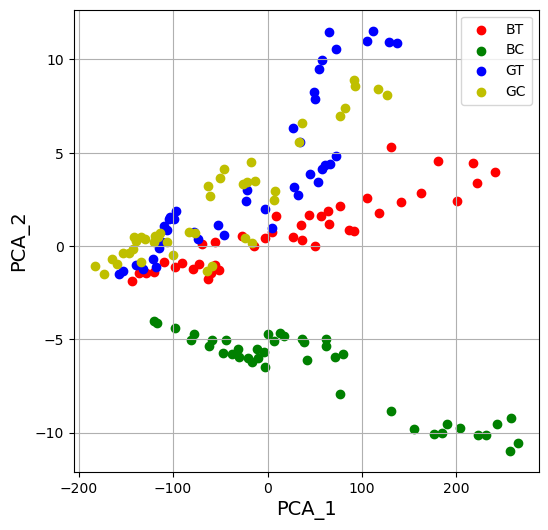

In [8]:
# PCAのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_pca[y == specie, 0], X_pca[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('PCA_1', fontsize =14)
plt.ylabel('PCA_2', fontsize =14)

plt.legend()
plt.grid()
plt.show()

### ③　標準化
PCAは、データのスケールに敏感であるため、次元削減の前に標準化が必要です。標準化では、各特徴量を平均0、標準偏差1にスケーリングし、異なるスケールを持つ特徴量が等しく扱われるようにします。これにより、PCAが特徴量のスケールに依存せず、データ全体の構造を正確に反映できます。

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
# 主成分分析（PCA）で2次元に次元削減
pca = PCA(n_components=9)  
X_pca = pca.fit_transform(X_std)

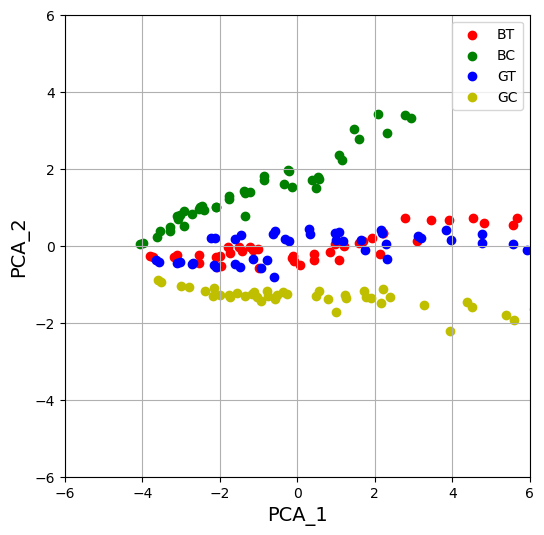

In [13]:
# PCAのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_pca[y == specie, 0], X_pca[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('PCA_1', fontsize =14)
plt.ylabel('PCA_2', fontsize =14)
plt.xlim(-6,6)
plt.ylim(-6, 6)

plt.legend()
plt.grid()
plt.show()

### ④　寄与率と累積寄与率
PCAでは、データセットの特徴量を直交する新たな軸（主成分）に変換しますが、それぞれの主成分は、元のデータの分散（情報量）をどの程度説明できるかを示す寄与率を持ちます。例えば、寄与率が0.4であれば、その主成分だけで元のデータの40%の分散を説明できることを意味します。累積寄与率は、最初のn個の主成分まででどれだけの分散を説明できるかを示します。累積寄与率が1に近づくほど、それまでの主成分がほぼ全ての分散を説明していることを意味します。

pythonでは`explained_variance_ratio_`からは各主成分の寄与率を計算できます。`np.cumsum()`メソッドより累積寄与率を計算します。

In [14]:
# 寄与率の計算
explained_variance_ratio = pca.explained_variance_ratio_

# 累積寄与率の計算
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [15]:
explained_variance_ratio

array([0.71650408, 0.13997561, 0.07671744, 0.02861021, 0.02109378,
       0.00737171, 0.00557342, 0.00230621, 0.00184754])

In [16]:
cumulative_explained_variance

array([0.71650408, 0.85647969, 0.93319713, 0.96180734, 0.98290112,
       0.99027283, 0.99584625, 0.99815246, 1.        ])

In [17]:
# 寄与率のプロット
plt.figure(figsize=(6, 6))

plt.bar(range(1, 10), explained_variance_ratio, alpha=0.2, align='center',
        label='Individual explained variance')

plt.step(range(1, 10), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.grid()
plt.show()

## 2. t-分布型確率的近傍埋め込み
t-分布型確率的近傍埋め込み（t-SNE）は、高次元データを低次元空間に効果的に埋め込む手法です。この手法は、データポイント間の局所的な類似性を保持しながら、データの高次元構造を視覚化します。

In [18]:
from sklearn.manifold import TSNE

### ①　モデル構築
t-SNEクラスは、Scikit-learnライブラリから提供されるt-分布型確率的近傍埋め込みのクラスです。このクラスを使用して、高次元データを低次元空間に埋め込み、データの局所的な構造を保持しながら視覚化します。t-SNEは、データポイント間の類似性を反映する2次元または3次元のプロットを生成し、複雑なデータのパターンを理解するのに役立ちます。

In [19]:
# t-SNEの実行
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

### 【解説】t-SNEのハイパーパラメータ

t-SNEにはいくつかの重要なハイパーパラメータがあり、これらはアルゴリズムの挙動や結果に大きな影響を与えます。以下に主要なハイパーパラメータを挙げ、それぞれの役割を説明します。
1. **`n_components`**
- **説明**: 埋め込み後の次元数を指定します。通常は2次元または3次元に設定されます。
- **デフォルト値**:
2. **`perplexity`**
- **説明**: t-SNEの「近傍」の尺度を決定するパラメータで、データポイントのローカルな構造をどの程度考慮するかを調整します。小さい値（例: 5）では局所的な構造を、より大きな値（例: 50）ではより広い範囲の構造を捉えます。データのサイズや密度によって適切な値が変わりますが、一般的には5〜50の範囲で設定されます。
- **デフォルト値30

3. **`learning_rate` (または `lr`)**
- **説明**: 埋め込み空間での更新のステップサイズを決定します。小さすぎると収束が遅くなり、大きすぎると発散する可能性があります。学習率は通常、データの範囲に基づいて調整されます。
- **デフォ*: 200

4. **`n_iter`**
- **説明**: 最適化のための反復回数を指定します。通常、t-SNEは多数の反復を必要とし、通常1000回以上の反復が推奨されます。学習の収束に影響します。
- **ト値**: 1000

5. **`init`**
- **説明**: 埋め込みの初期化方法を指定します。`'random'`と`'pca'`のオプションがあります。`'pca'`を選択すると、初期値をPCAで初期化します。
- **デフ**: `'random'`

6. **`metric`**
- **説明**: データ間の距離を計算するためのメトリックを指定します。例えば、ユークリッド距離（`'euclidean'`）やマンハッタン距離（`'manhattan'`）などがあります。
- **デ値**: `'euclidean'`

7. **`early_exaggeration`**
- **説明**: 初期段階でのクラスタリングを強調するためのパラメータです。通常はデフォルト値（12.0）のままにしす。
- **デフォルト値**: 12.0

8. **`random_state`**
- **説明**: 再現性を保つための乱数シードを指定します。結果が再現可能になるようきます。
- **デフォルト値**: `None`

9. **`n_iter_without_progress`**
- **説明**: 進展がないとみなすための許容反復数。収束速度をるために使用されます。
- **デフォルト値**: 300

10. **`min_grad_norm`**
- **説明**: 勾配のノルムがこの値以下になった場

これらのハイパーパラメータは、t-SNEの結果に大きな影響を与えるため、データセットや目的に応じて適切に設定することが重要です。特に、perplexityやlearning_rateは結果の品質に直接影響するため、試行錯誤して最適な値を見つけることが推奨されます。`は結果の品質に直接影響するため、試行錯誤して最適な値を見つけることが推奨されます。

### ②　二次元プロット（可視化）

In [20]:
# t-SNEのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_tsne[y == specie, 0], X_tsne[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('TSNE_1', fontsize =14)
plt.ylabel('TSNE_2', fontsize =14)
plt.xlim(-30,30)
plt.ylim(-10,10)

plt.legend()
plt.grid()
plt.show()

### ③　標準化

t-分布型確率的近傍埋め込み（t-SNE）を適用する際には、データの標準化が推奨されます。標準化を進めることで、データのスケールによる偏りを防ぎ、より正確で意味のある可視化を得ることができます。標準化を行わないと、データのスケールによってt-SNEの結果が歪む可能性があるとされます。その影響について比較してみましょう。

In [21]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [22]:
X_tsne = tsne.fit_transform(X_std)

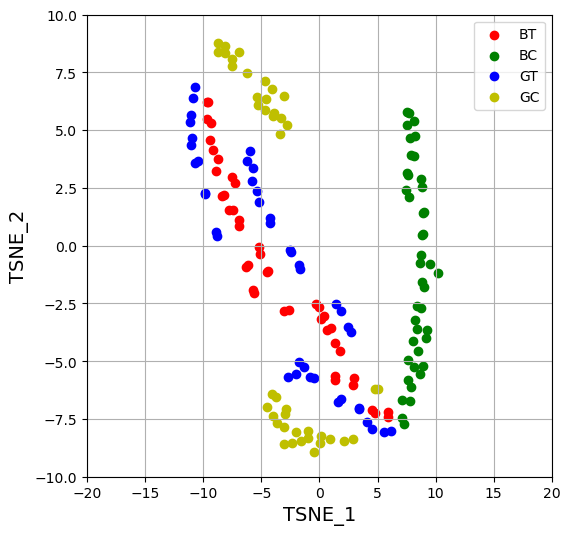

In [24]:
# t-SNEのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_tsne[y == specie, 0], X_tsne[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('TSNE_1', fontsize =14)
plt.ylabel('TSNE_2', fontsize =14)
plt.xlim(-20,20)
plt.ylim(-10,10)

plt.legend()
plt.grid()
plt.show()

## 3. 統一マニホールド近似と射影（UMAP）
統一マニホールド近似と射影（UMAP）は、高次元データを低次元空間に効率的に埋め込む手法です。UMAPは、データの局所的な構造と全体的な構造を保持しながら、複雑なデータの可視化を行います。

In [25]:
import umap

ModuleNotFoundError: No module named 'umap'

### ①　モデル構築
UMAPクラスは、umap-learnライブラリから提供される統一マニホールド近似と射影の実装クラスです。このクラスを使用して、高次元データを低次元空間に効果的に埋め込むことができます。

In [62]:
# UMAPの実行
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

### 【解説】UMAPのハイパーパラメータ
UMAP（Uniform Manifold Approximation and Projection）は、高次元データの低次元空間への埋め込みを行うための手法で、特にデータの局所的および大域的な構造を保持することに優れています。UMAPにはいくつかの重要なハイパーパラメータがあり、これらを調整することで埋め込みの特性を制御できます。

1. **`n_neighbors`**
- **説明**: 各データポイントの近傍の数を指定します。このパラメータは局所的な構造をどの程度保持するかに影響を与えます。値が小さいと局所的な構造を強調し、値が大きいとより大域的な構造が強調されます。一般的には5〜50の範囲で設定されます。
- **デフォルト値**: 15

2. **`min_dist`**
- **説明**: 埋め込み空間でのクラスタの圧縮度を決定するパラメータです。値が小さいとデータポイントがより密集し、値が大きいとデータポイント間に余裕が生まれます。`min_dist`は0.0から0.99までの範囲で設定されることが多いです。
- **デフォルト値**: 0.1

3. **`n_components`**
- **説明**: 埋め込み後の次元数を指定します。通常は2次元または3次元に設定されますが、場合によってはそれ以上の次元に設定することもあります。
- **デフォルト値**: 2

4. **`metric`**
- **説明**: 高次元空間での距離を計算するためのメトリックを指定します。デフォルトはユークリッド距離ですが、他にもマンハッタン距離やコサイン類似度、またはカスタムメトリックなども使用できます。
- **デフォルト値**: `'euclidean'`

5. **`random_state`**
- **説明**: 再現性を確保するための乱数シードを指定します。指定しない場合はランダムになります。
- **デフォルト値**: `None`

6. **`spread`**
- **説明**: `min_dist`と組み合わせて使用され、埋め込み空間でのクラスターの間隔を制御します。`spread`と`min_dist`の組み合わせによって、データの局所的なクラスタリングの度合いが決まります。
- **デフォルト値**: 1.0

7. **`set_op_mix_ratio`**
- **説明**: 最近傍グラフの構築に使用される。このパラメータは0から1の範囲で設定され、0に近いと「OR」論理（大域的構造を強調）、1に近いと「AND」論理（局所的構造を強調）になります。
- **デフォルト値**: 1.0

8. **`local_connectivity`**
- **説明**: 各データポイントが属するべき最小の近傍クラスタの数を指定します。これにより、少なくともこの数の近傍と接続されるようになります。
- **デフォルト値**: 1

9. **`repulsion_strength`**
- **説明**: 埋め込み空間でのデータポイント間の反発力を調整します。値が大きいとポイントがより分離され、小さいとより密集します。
- **デフォルト値**: 1.0

10. **`negative_sample_rate`**
- **説明**: UMAPのアルゴリズムで使用される負のサンプルの数を指定します。このパラメータは最適化の過程で使用される負のサンプルの比率を制御します。
- **デフォルト値**: 5

11. **`transform_seed`**
- **説明**: UMAPのトランスフォーメーションが再現可能になるようにシードを設定します。埋め込みがトレーニングされる際にこのシードが使用されます。
- **デフォルト値**: 42

これらのハイパーパラメータは、UMAPによるデータの埋め込み結果に大きく影響します。特に`n_neighbors`、`min_dist`、および`metric`は結果に大きな影響を与えるため、データの特性や分析目的に応じて適切に調整することが重要です。

### ②　二次元プロット（可視化）

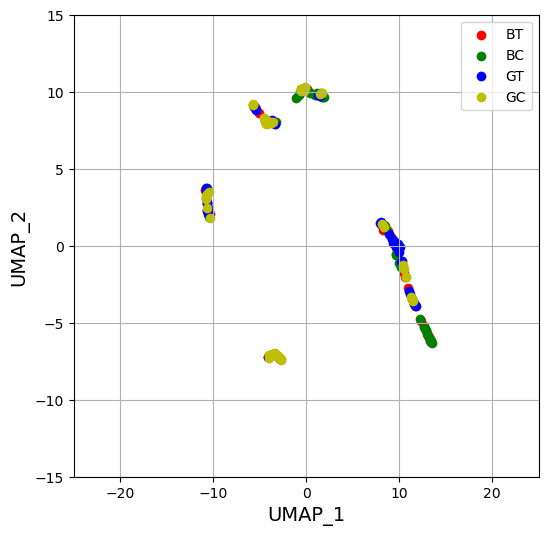

In [65]:
# UMAPのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_umap[y == specie, 0], X_umap[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('UMAP_1', fontsize =14)
plt.ylabel('UMAP_2', fontsize =14)
plt.xlim(-25,25)
plt.ylim(-15,15)

plt.legend()
plt.grid()
plt.show()

### ③　標準化

UMAPについても適用する際には、データの標準化が推奨されます。ここでも標準化を通じた影響について比較してみましょう。

In [67]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [68]:
X_umap = umap_model.fit_transform(X_std)

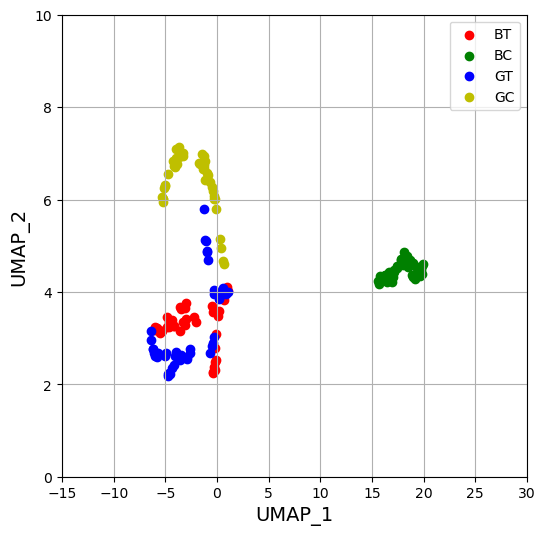

In [69]:
# UMAPのプロット
plt.figure(figsize=(6, 6))

colors = ['r', 'g', 'b','y']
species = ['BT', 'BC', 'GT','GC']

for color, specie in zip(colors, species):
    plt.scatter(X_umap[y == specie, 0], X_umap[y == specie, 1], 
                label=specie, 
                color=color
               )

plt.xlabel('UMAP_1', fontsize =14)
plt.ylabel('UMAP_2', fontsize =14)
plt.xlim(-15,30)
plt.ylim(-0,10)

plt.legend()
plt.grid()
plt.show()

# 3. クラスタリング
**クラスタリング**とは、データをいくつかのグループ（クラスター）に分けるデータ分析手法の一つです。この手法では、同じクラスターに属するデータポイントが互いに類似しており、異なるクラスターのデータポイントとの間には顕著な違いがあるようにします。クラスタリングは、教師なし学習の一種で、事前にラベルが付けられていないデータのパターンを識別するために使用されます。

### クラスタリングの特徴
クラスタリングにはさまざまな方法があり、データの特性や目的に応じて適切なアルゴリズムが選択されます。主なクラスタリング手法には以下があります。

1. **階層クラスタリング**：  
    データポイントを階層的にグループ化する方法です。凝集型（アグロメレイティブ）クラスタリングと分割型（ディバイシブ）クラスタリングに分かれます。結果はデンドログラムとして視覚化され、クラスターの形成過程を視覚的に確認できます。

2. **K-平均法 (K-mean）**:  
   事前に設定したクラスター数`k`にデータを分ける方法です。アルゴリズムは、各データポイントを最も近いクラスターの重心に割り当て、クラスターの中心（重心）が最適化されるまで繰り返します。

## 1.階層クラスタリング分析
階層クラスタリングは、データを階層的にグループ化するためのクラスタリング手法です。階層クラスタリングの結果は、デンドログラムと呼ばれるツリーストラクチャーで視覚化されます。デンドログラムでは、クラスターがどのようにして結合されたのか（または分割されたのか）、またクラスター間の距離がどれくらいかが示されます。

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram

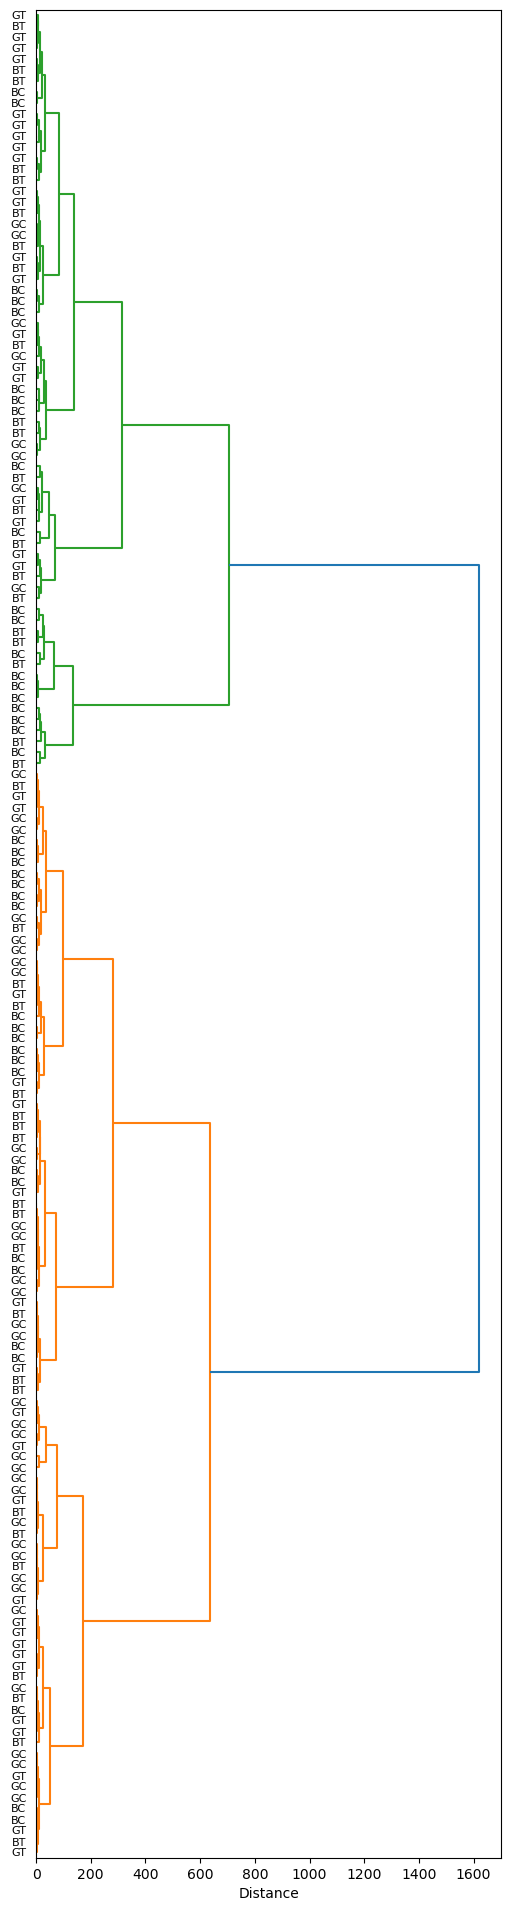

In [73]:
plt.figure(figsize=(6, 24))

# 階層クラスタリング
linkage_matrix = linkage(X, method='ward')

dendrogram(linkage_matrix, 
           labels = y.tolist(), 
           orientation = 'right',
          )

plt.xlabel('Distance')
plt.yticks(fontsize=8)  # 品種のフォントサイズを8に設定
plt.show()

### 【解説】階層クラスタリングのハイパーパラメータ
階層クラスタリングは、データの階層的な構造を表現するクラスタリング手法で、クラスタの数を事前に指定する必要がありません。階層クラスタリングの主なハイパーパラメータは、以下のようにクラスタリングの手法とクラスタ間の距離をどのように定義するかに関するものです。

1. **`method`（linkage法）**
- **説明**: クラスタ間の距離をどのように計算するかを指定します。以下のような様々な手法があります:
  - **`single`**: シングルリンク法。最も近いポイント間の距離をクラスタ間の距離とする。
  - **`complete`**: コンプリートリンク法。最も遠いポイント間の距離をクラスタ間の距離とする。
  - **`average`**: 平均リンク法。すべてのペアの平均距離をクラスタ間の距離とする。
  - **`weighted`**: 重み付き平均リンク法。平均リンク法に似ていますが、クラスタのサイズに応じて重み付けを行います。
  - **`centroid`**: セントロイド法。各クラスタの重心間の距離を用います。
  - **`median`**: メディアン法。セントロイド法に似ていますが、重心の計算方法が異なります。
  - **`ward`**: ウォード法。全体の分散が最小になるようにクラスタを結合します。デフォルトではこの手法がよく用いられます。

2. **`metric`（距離メトリック）**
- **説明**: データポイント間の距離を計算するためのメトリックを指定します。以下のようなオプションがあります:
  - **`euclidean`**: ユークリッド距離。最も一般的に使用される距離メトリック。
  - **`manhattan`**: マンハッタン距離。各軸に沿った距離の合計。
  - **`cosine`**: コサイン距離。ベクトル間の角度に基づく距離。
  - **`mahalanobis`**: マハラノビス距離。分散共分散行列を考慮した距離。

3. **`criterion`（停止基準）**
- **説明**: クラスタリングを終了する条件を指定します。一般的なものには以下があります:
  - **`inconsistent`**: 不一致の基準を使用してクラスタの結合を停止する。
  - **`distance`**: 距離のしきい値を指定してクラスタの結合を停止する。
  - **`maxclust`**: 指定されたクラスタ数に達するまでクラスタの結合を続ける。

4. **`threshold`** 
- **説明**: クラスタを結合する際の距離のしきい値を指定します。`criterion='distance'`と組み合わせて使用されます。

5. **`depth`**
- **説明**: `criterion='inconsistent'`を使用する際に、不一致性の計算に使用されるツリーの深さを指定します。

6. **`optimal_ordering`**
- **説明**: デンドログラムの視覚化を最適化するために、クラスタ内のポイントを並び替えるかどうかを指定します。これにより、デンドログラムの見た目が整理され、より解釈しやすくなります。
- **デフォルト値**: `False`

### その他の考慮事項
- **データの標準化**: 距離ベースのクラスタリング手法では、各特徴のスケールの違いが影響を与えるため、特徴量の標準化やスケーリングが推奨されます。

これらのハイパーパラメータを調整することで、クラスタリングの結果やデンドログラムの解釈が大きく変わります。特に`method`と`metric`の選択は、クラスタリングの特性やデータの構造に大きな影響を与えるため、データの特性に応じて適切に選択することが重要です。

## 2. k-平均法（k-means）
K-平均法の目的は、データセット内のオブジェクトを指定された数（K）のクラスタに分割することです。クラスタは、データの中心点（平均）に基づいて形成されます。このアルゴリズムは以下の手順で実行されます。

まず、K個のクラスタ中心（セントロイド）をランダムに選定します。次に、各データポイントを最も近いクラスタ中心に割り当てます。この際、ユークリッド距離などの距離指標に基づいて、データポイントは最も近いクラスタ中心に属します。その後、各クラスタに属するデータポイントの平均を計算し、新しいクラスタ中心として設定します。このプロセスを、クラスタ中心がほとんど変化しなくなるか、変更が指定された閾値以下になるまで繰り返します。

In [77]:
from sklearn.cluster import KMeans

### ①　モデル構築
KMeansクラスは、scikit-learnライブラリから提供されるクラスタリングアルゴリズムの実装クラスです。このクラスを使用して、データを指定した数のクラスタに分割することができます。

In [79]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [80]:
# WCSSを格納するリスト
wcss = []

# クラスタ数を1から10まで試す
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

### 【解説】k-平均法のハイパーパラメータ
K-平均法（K-means）は、データをK個のクラスタに分けるクラスタリング手法です。この手法にはいくつかの重要なハイパーパラメータがあり、これらを適切に設定することでクラスタリング結果の品質を改善できます。以下はK-meansの主なハイパーパラメータです。

1. **`n_clusters`**
- **説明**: クラスタの数を指定します。このパラメータはK-meansの最も重要な設定であり、通常はデータセットの性質に応じて最適なクラスタ数を選択します。エルボー法やシルエット分析などの方法を用いて適切なクラスタ数を決定するのが一般的です。
- **デフォルト値**: 8

2. **`init`**
- **説明**: 初期クラスタ中心（セントロイド）の選択方法を指定します。初期セントロイドの選択は結果に大きな影響を与えるため、慎重に選ぶ必要があります。
  - **`k-means++`**: セントロイドを効果的に初期化するためのヒューリスティックな方法。一般的に推奨される方法です。
  - **`random`**: ランダムに初期セントロイドを選ぶ方法。
  - **任意の配列**: ユーザーが指定した初期セントロイドを使用。

3. **`max_iter`**
- **説明**: K-meansアルゴリズムの最大反復回数を指定します。収束しない場合でも、この回数に達するとアルゴリズムは停止します。
- **デフォルト値**: 300

4. **`tol`（tolerance）**
- **説明**: 収束の許容誤差。セントロイドの位置の変化がこの値以下になった場合、アルゴリズムは収束したとみなします。
- **デフォルト値**: 1e-4

5. **`n_init`**
- **説明**: 異なる初期クラスタ中心に対してK-meansアルゴリズムを繰り返す回数。最も低いSSE（Sum of Squared Errors）を持つ結果が選ばれます。これにより、ローカルミニマに陥るリスクを低減します。
- **デフォルト値**: 10

6. **`random_state`**
- **説明**: 再現性を確保するための乱数シードを指定します。指定すると、同じ初期セントロイドが選ばれるため、結果が再現可能になります。
- **デフォルト値**: `None`

7. **`algorithm`**
- **説明**: 使用するK-meansアルゴリズムの種類を指定します。
  - **`auto`**: デフォルトで選ばれる最適なアルゴリズムを自動的に選択します。
  - **`full`**: 古典的なLloyd'sアルゴリズムを使用。
  - **`elkan`**: Elkan'sアルゴリズムを使用。距離計算を高速化するために三角不等式を利用します。

8. **`precompute_distances`**
- **説明**: 距離を事前に計算するかどうかを指定します。現在のScikit-learnでは、このパラメータは無視され、`True`とみなされます。

これらのハイパーパラメータの適切な設定は、クラスタリングの品質や効率に大きな影響を与えます。特に、`n_clusters`の選択はクラスタリング結果に直結するため、慎重に選択する必要があります。また、`init`や`n_init`はアルゴリズムの収束性や最終的なクラスタリング結果に影響を与えるため、ローカルミニマに陥るリスクを軽減するために適切に設定することが重要です。

### ②　エルボー法の可視化図

#### クラスタ―数の選定
K-meansクラスタリングは、与えられたデータを指定された数のクラスタに分割する手法です。エルボー法（Elbow Method）は、K-meansクラスタリングにおいて適切なクラスタ数を選択するための一般的なアプローチの一つです。

エルボー法のアイデアは、異なるクラスタ数を試して、クラスタ内のばらつき（クラスタ内誤差平方和；SSE：Sum of Squared Error）がどれだけ小さくなるかを評価することです。クラスタ内の誤差平方和は、各データ点とそのクラスタの重心との距離の二乗の合計を示します。これより、誤差平方和が小さい値ほど各データ点がそのクラスタの中に集まっていることを示します。

エルボー法の手順：

1. 異なるクラスタ数（Kの値）を試して、それぞれのクラスタリング結果のクラスタ内誤差平方和を計算。
1. 各クラスタ数に対するクラスタ内誤差平方和（SSE）をプロット。
1. プロットを見て、誤差平方和（SSE）の減少率が急速で減少が鈍化するタイミング（肘部分）を探索。
1. エルボー（肘部分）が見つかったクラスタ数を選択。

この肘部分は、クラスタ数が増加するにつれて、誤差平方和（SSE）の減少率が緩やかになるため、最適なクラスタ数を示すことがあります。  
エルボー法は、クラスタ数を選択するためのヒューリスティックな手法ですが、必ずしも肘部分が明確に見えるわけではなく、実際のデータによっては明らかな肘部分がない場合もあります。そのため、エルボー法を用いつつも、他の方法やドメイン知識と組み合わせて最適なクラスタ数を選択することが重要です。

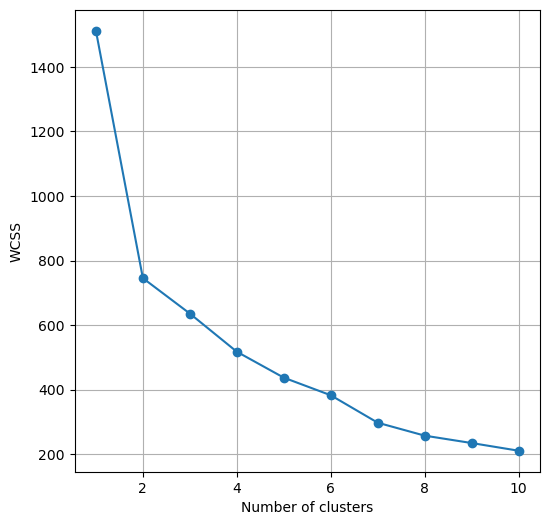

In [84]:
# エルボー法のグラフをプロット
plt.figure(figsize=(6, 6))

plt.plot(range(1, 11), wcss, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

### ③　主成分分析（PCA）との併用

PCAは高次元データを低次元に変換する手法であり、データセットの主要な変動を説明する軸（主成分）を見つけます。ここではIrisの4つのデータ（4次元）のデータセット X をPCAで2次元に次元削減し、その図に対してk-meansクラスタ法を適用します。次元削減の大きな利点は、データを2次元または3次元に投影することで、データの構造やクラスタリングの結果を視覚的に確認できる点です。特にK-meansクラスタリングの結果を視覚化する際に、各クラスタがどのように分布しているかを直感的に理解する助けになります。

In [86]:
# K-meansクラスタリング
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_std)

In [87]:
from sklearn.decomposition import PCA

In [88]:
# 主成分分析（PCA）で2次元に次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

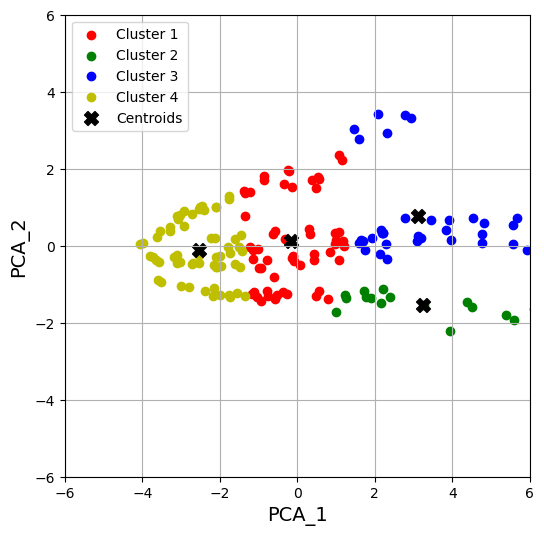

In [89]:
# クラスタリング結果のプロット
fig, ax = plt.subplots(figsize=(6,6))

colors = ['r', 'g', 'b','y']

for i in range(4):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')
    
# クラスタの中心をプロット
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            color='black', marker='X', s=100, label='Centroids')

plt.xlabel('PCA_1', fontsize =14)
plt.ylabel('PCA_2', fontsize =14)
plt.xlim(-6,6)
plt.ylim(-6, 6)

plt.legend()
plt.grid()

plt.show()